In [39]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df_spotify = pd.read_csv('../data/raw/dataset.csv', index_col = 0)

df_spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [40]:

# Number of rows and columns
nrows, ncols = df_spotify.shape
print(f'The dataset has {nrows} rows and {ncols} columns')

The dataset has 114000 rows and 20 columns


In [41]:

# Check for duplicated rows
duplicated_rows = df_spotify.duplicated().sum()

print(f'The dataset has {duplicated_rows} duplicated rows')

# Drop duplicated rows
df_spotify.drop_duplicates(inplace = True)
print('Duplicated rows were dropped')

# Number of rows and columns
nrows, ncols = df_spotify.shape
print(f'The dataset has {nrows} rows and {ncols} columns after dropping duplicated rows')

The dataset has 450 duplicated rows
Duplicated rows were dropped
The dataset has 113550 rows and 20 columns after dropping duplicated rows


## Column Descriptions

| **Column**         | **Description**                                                                                        |
|--------------------|--------------------------------------------------------------------------------------------------------|
| `track_id`         | The unique Spotify ID for each track.                                                                  |
| `artists`          | Names of the artists who performed the track, separated by `;`.                                        |
| `album_name`       | The name of the album in which the track appears.                                                      |
| `track_name`       | The title of the track.                                                                                |
| `popularity`       | A value between 0 and 100, indicating the track's popularity based on recent plays.                    |
| `duration_ms`      | The length of the track in milliseconds.                                                               |
| `explicit`         | Boolean indicating whether the track contains explicit content.                                        |
| `danceability`     | Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).           |
| `energy`           | Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).                |
| `key`              | The musical key of the track mapped using standard Pitch Class notation.                               |
| `loudness`         | Overall loudness of the track in decibels (dB).                                                        |
| `mode`             | Indicates the modality (major or minor) of the track.                                                  |
| `speechiness`      | Detects the presence of spoken words in the track.                                                     |
| `acousticness`     | Confidence measure of whether the track is acoustic (0.0 = not acoustic, 1.0 = highly acoustic).       |
| `instrumentalness` | Predicts whether a track contains vocals (0.0 = contains vocals, 1.0 = instrumental).                  |
| `liveness`         | Detects the presence of an audience in the recording (0.0 = studio recording, 1.0 = live performance). |
| `valence`          | Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).                |
| `tempo`            | Estimated tempo of the track in beats per minute (BPM).                                                |
| `time_signature`   | Estimated time signature of the track (3 to 7).                                                        |
| `track_genre`      | The specific genre associated with the track.                                                          |


In [42]:

# Check the data types of the columns
df_datatypes = df_spotify.dtypes.to_frame('Data Types')
df_datatypes

,Data Types
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64


In [43]:

# Select object columns
obj_cols = df_spotify.select_dtypes(include='object').columns

# Create a dictionary with column names and their unique data types
unique_dtypes = {col: set(map(type, df_spotify[col].dropna())) for col in obj_cols}

# Add the unique data types to the df_datatypes DataFrame
df_datatypes['Unique Object Data Types'] = pd.Series(unique_dtypes)
df_datatypes


,Data Types,Unique Object Data Types
track_id,object,{<class 'str'>}
artists,object,{<class 'str'>}
album_name,object,{<class 'str'>}
track_name,object,{<class 'str'>}
popularity,int64,NaN
duration_ms,int64,NaN
explicit,bool,NaN
danceability,float64,NaN
energy,float64,NaN
key,int64,NaN


In [44]:

# Missing values in each row
missing_values_per_row = df_spotify.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (df_spotify.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

113549 row(s) have 0 missing values
1 row(s) have 3 missing values
Total number of rows with missing values: 1


In [45]:

# Numerical columns 
num_cols = df_spotify[df_spotify.columns[
    (df_spotify.dtypes == 'float64') | (df_spotify.dtypes == 'int64')
]]

print('Summary Statistics for Numerical Columns')
num_cols.describe().T

Summary Statistics for Numerical Columns


,count,mean,std,min,25%,50%,75%,max
popularity,113550.0,33.324139,22.283976,0.000,17.00000,35.000000,50.000000,100.000
duration_ms,113550.0,228079.362202,106414.782554,0.000,174180.25000,213000.000000,261587.750000,5237295.000
danceability,113550.0,0.567031,0.173408,0.000,0.45600,0.580000,0.695000,0.985
energy,113550.0,0.642090,0.251052,0.000,0.47300,0.685000,0.854000,1.000
key,113550.0,5.309467,3.560134,0.000,2.00000,5.000000,8.000000,11.000
loudness,113550.0,-8.243419,5.011401,-49.531,-9.99775,-6.997000,-5.001000,4.532
mode,113550.0,0.637860,0.480621,0.000,0.00000,1.000000,1.000000,1.000
speechiness,113550.0,0.084674,0.105761,0.000,0.03590,0.048900,0.084500,0.965
acousticness,113550.0,0.314067,0.331907,0.000,0.01680,0.168000,0.596000,0.996
instrumentalness,113550.0,0.155702,0.309216,0.000,0.00000,0.000041,0.048675,1.000


In [46]:
# Check for missing values in the numerical columns

missing_values = num_cols.isnull().sum()
missing_values = missing_values[missing_values > 0]

print('Number of Missing values in the numerical columns')
print(missing_values.shape)

Number of Missing values in the numerical columns
(0,)


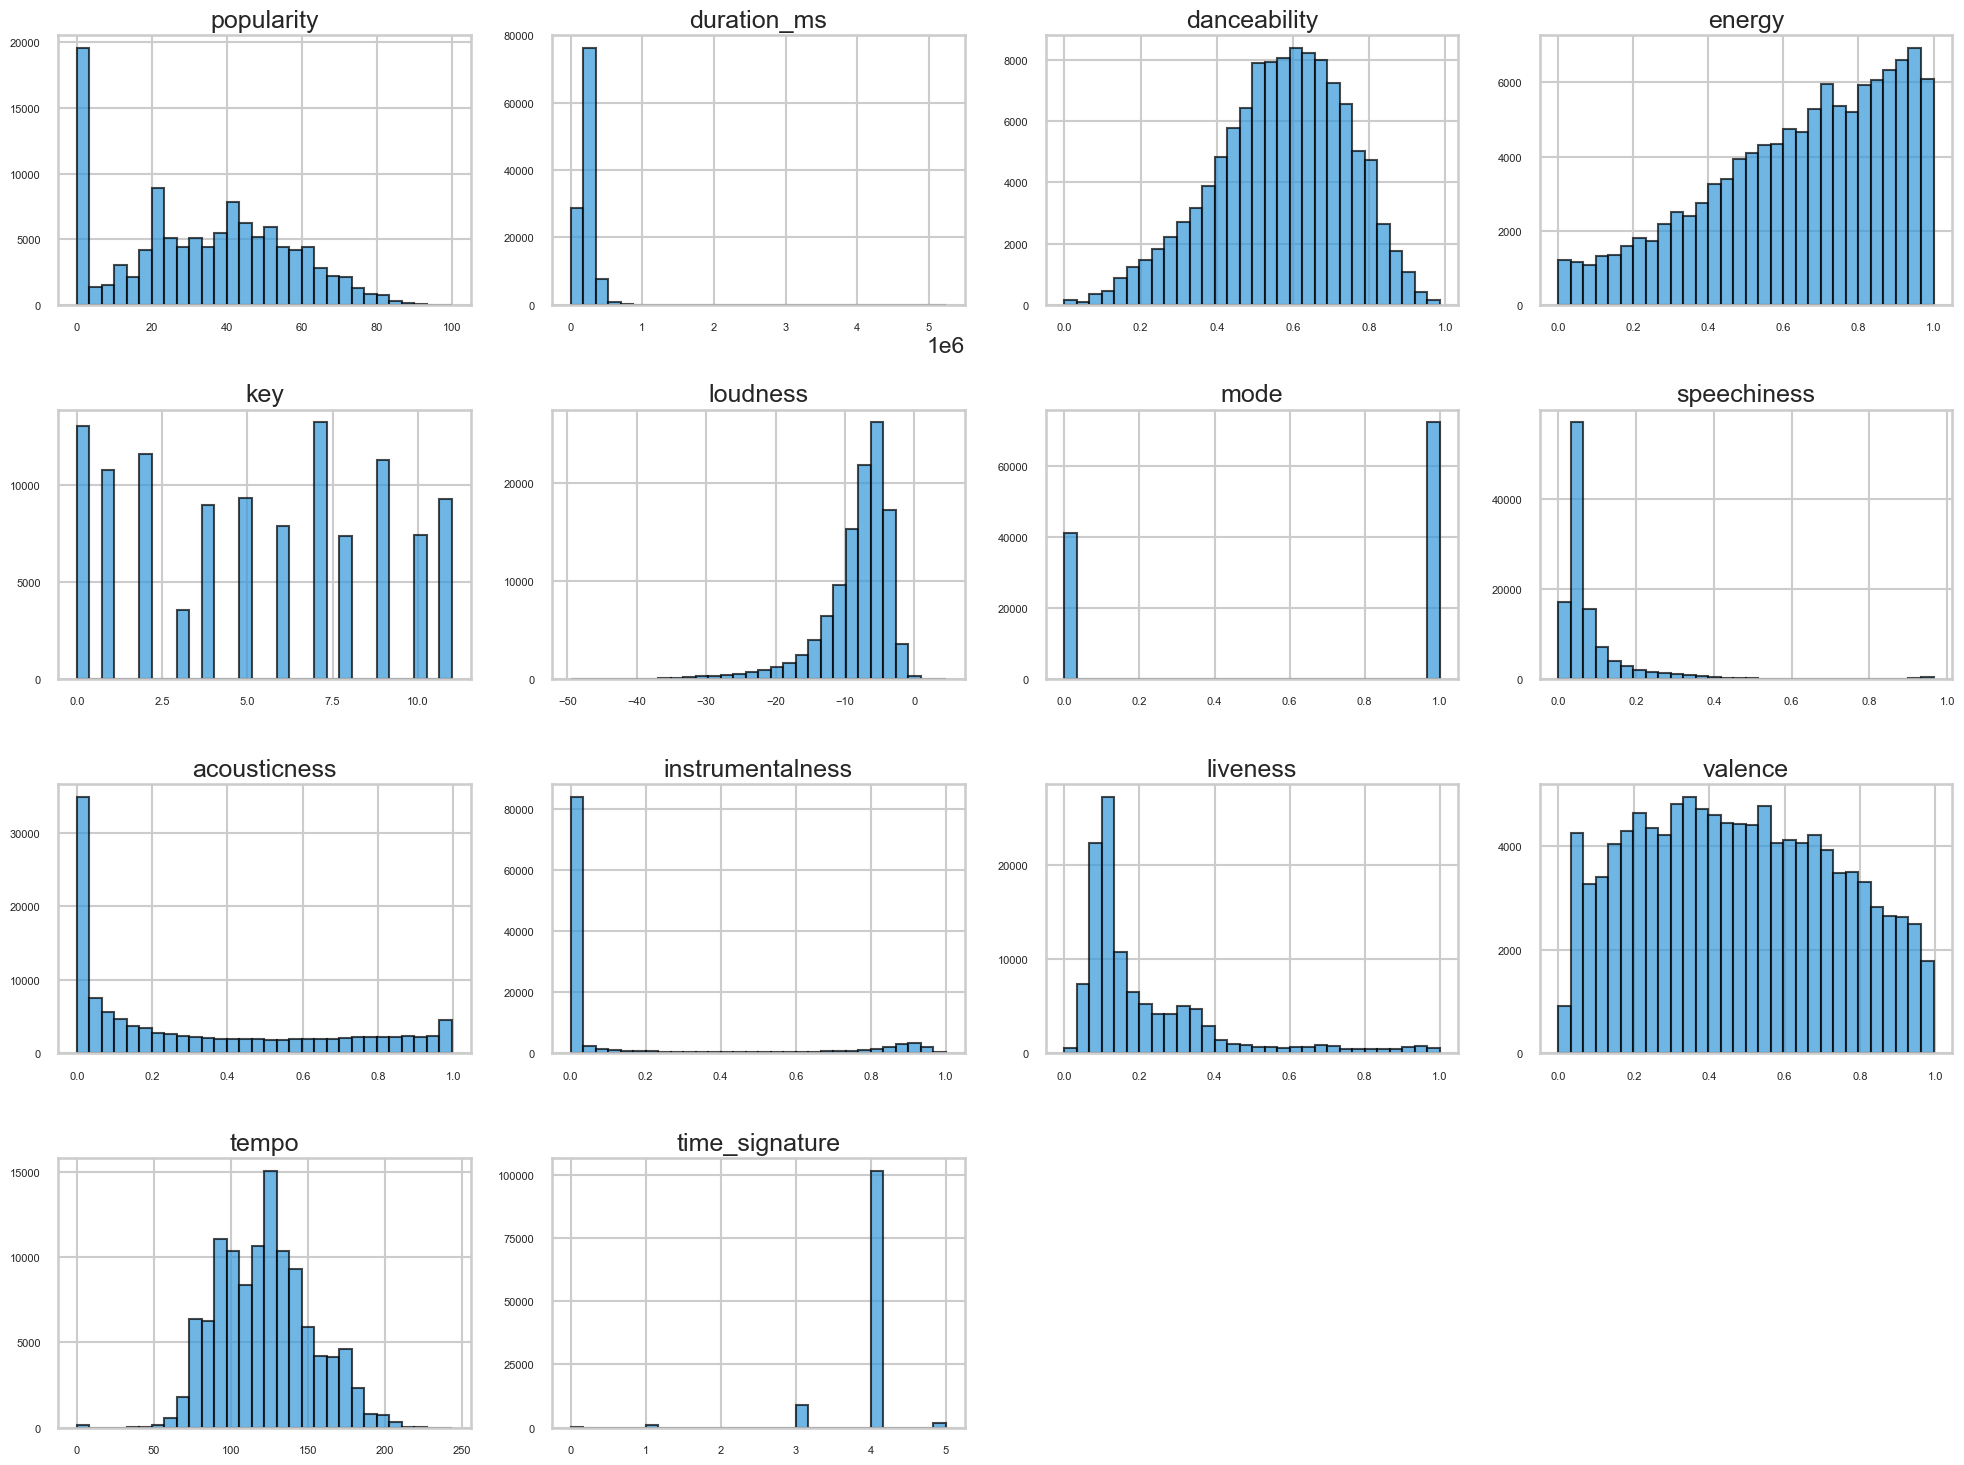

In [47]:

sns.set_theme(style='whitegrid')
sns.set_context("talk")

num_cols.hist(figsize=(20, 15), bins=30, xlabelsize=8, ylabelsize=8, color="#3498db", edgecolor="black", alpha=0.7) 

plt.tight_layout()
plt.show()

## Observations

- **Danceability, Tempo, Valence**: These columns display distributions that are approximately normal.

- **Loudness**: The distribution is skewed to the left, with most songs having noise levels between -15 and -5 dB.

- **Speechiness, Acousticness, Instrumentalness, and Liveness**: These features have right-skewed distributions, with the majority of songs showing low values.

- **Popularity**: There is a notable number of songs with a popularity score of 0, while the rest show a distribution close to normal.

- **Duration (ms)**: This column is right-skewed, with most tracks lasting under 500,000 ms (about 8 minutes), and the longest track reaching around 5 million ms (83 minutes).

- **Energy**: The values in this feature increase steadily from 0 to 1, with most songs falling between 0.4 and 0.9.

- **Key**: Values in this column range from 0 to 11 and are fairly evenly distributed.

- **Mode**: This column has values of 0 and 1, with the value 1 appearing almost twice as often as 0.

- **Time Signature**: Most tracks have a time signature of 5.

- **Range of Values**: The columns danceability, energy, speechiness, acousticness, instrumentalness, liveness, and valence all have minimum values of 0 and maximum values of 1.


In [48]:

# Categorical columns

cat_cols = df_spotify[df_spotify.columns[
    (df_spotify.dtypes == 'object') |(df_spotify.dtypes == 'bool')
]]

print('Summary Statistics for Categorical Columns')
cat_cols.describe().T


Summary Statistics for Categorical Columns


,count,unique,top,freq
track_id,113550,89741,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113549,31437,The Beatles,279
album_name,113549,46589,Alternative Christmas 2022,195
track_name,113549,73608,Run Rudolph Run,151
explicit,113550,2,False,103832
track_genre,113550,114,acoustic,1000


In [49]:

cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     113550 non-null  object
 1   artists      113549 non-null  object
 2   album_name   113549 non-null  object
 3   track_name   113549 non-null  object
 4   explicit     113550 non-null  bool  
 5   track_genre  113550 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.3+ MB


In [50]:
# Check for missing values in the categorical columns
cat_cols[cat_cols.isnull().any(axis=1)]


,track_id,artists,album_name,track_name,explicit,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,False,k-pop


In [51]:
# Drop rows with missing values in the categorical columns
index_to_drop = df_spotify[cat_cols.isnull().any(axis=1)].index
df_spotify.drop(index_to_drop, inplace=True)

print(f'Rows with missing values dropped. Updated DataFrame shape: {df_spotify.shape}')



Rows with missing values dropped. Updated DataFrame shape: (113549, 20)


In [52]:

# Check the description of the categorical columns again
cat_cols.describe().T

,count,unique,top,freq
track_id,113550,89741,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113549,31437,The Beatles,279
album_name,113549,46589,Alternative Christmas 2022,195
track_name,113549,73608,Run Rudolph Run,151
explicit,113550,2,False,103832
track_genre,113550,114,acoustic,1000


## Observations

- **Duplicate Entries**: Certain tracks appear multiple times, as the total count exceeds the number of unique entries.

- **Top Artist**: "The Beatles" emerges as the most frequent artist with a relatively high count.

- **Top Album**: The album "Alternative Christmas 2022" appears most frequently, with 195 entries.

- **Most Common Track**: The track "Run Rudolph Run" has the highest occurrence rate.

- **Explicit Content**: Most tracks are marked as non-explicit in terms of lyrics.

- **Most Common Genre**: "Acoustic" stands out as the genre with the highest frequency.


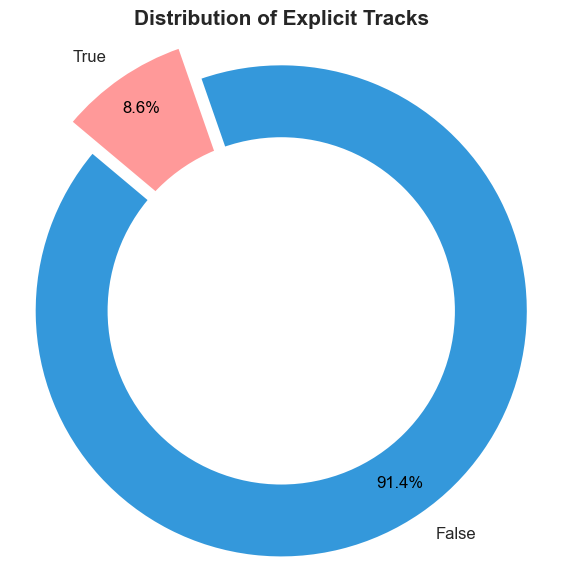

In [54]:

sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Unique values and value counts
unique_values, value_counts = np.unique(cat_cols['explicit'], return_counts=True)

fig, ax = plt.subplots(figsize=(7, 7))  

explode = [0, 0.15]  
colors = ['#3498db', '#ff9999']

wedges, texts, autotexts = ax.pie(
    value_counts, labels=unique_values, autopct='%1.1f%%', startangle=140,
    colors=colors, explode=explode, pctdistance=0.85, textprops={'fontsize': 12},
    wedgeprops=dict(edgecolor='white', linewidth=1.5)
)

# Improve the layout of percentage labels
for autotext in autotexts:
    autotext.set_color("black") 
    autotext.set_fontsize(12) 

# Draw a center circle for a donut-like effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio for circular shape
ax.axis('equal')
ax.set_title('Distribution of Explicit Tracks', fontsize=15, weight='bold')
plt.show()

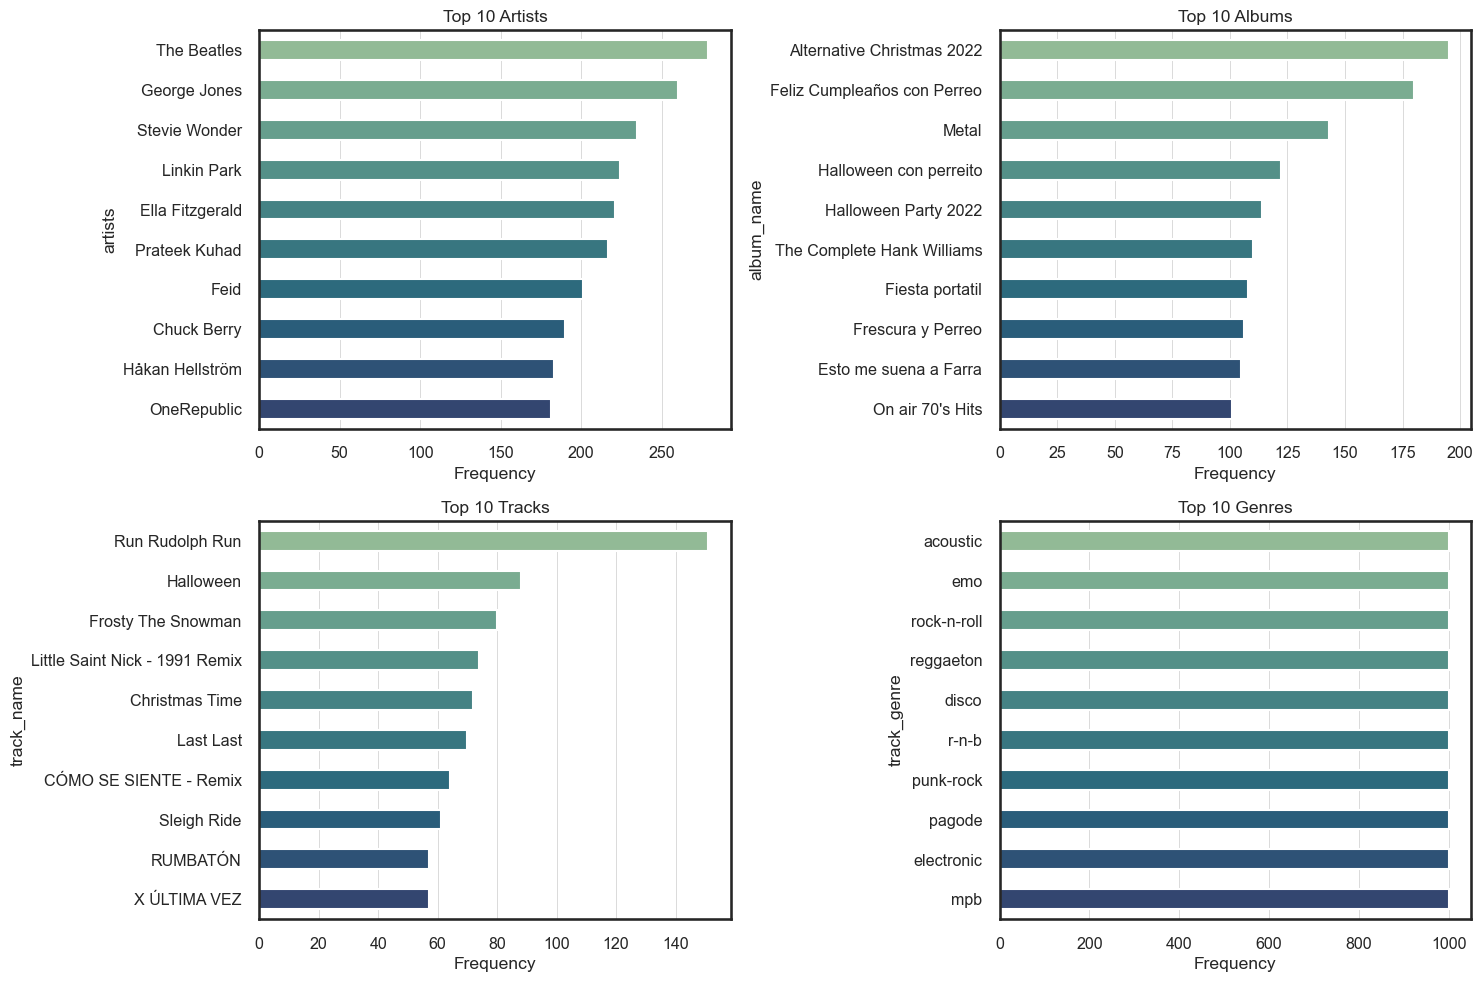

In [62]:
import warnings

# Set the consistent Seaborn theme and style with a customized background color
sns.set_theme(style="white")
sns.set_context("talk", font_scale=0.7)

# Get the top N most frequent artists, albums, tracks, and genres
top_n = 10
top_artists = df_spotify['artists'].value_counts().head(top_n)
top_albums = df_spotify['album_name'].value_counts().head(top_n)
top_tracks = df_spotify['track_name'].value_counts().head(top_n)
top_genres = df_spotify['track_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0, 0], orient='h', width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="crest", ax=axes[0, 1], orient='h', width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1, 0], orient='h', width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[1, 1], orient='h', width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1)

    plt.tight_layout()
    plt.show()

- **Top 10 Artists**: All the top 10 artists are well-known, with "The Beatles" being the most popular.

- **Top 10 Track Genres**: The top 10 genres are popular categories, each appearing with the same frequency (frequency = 1000).


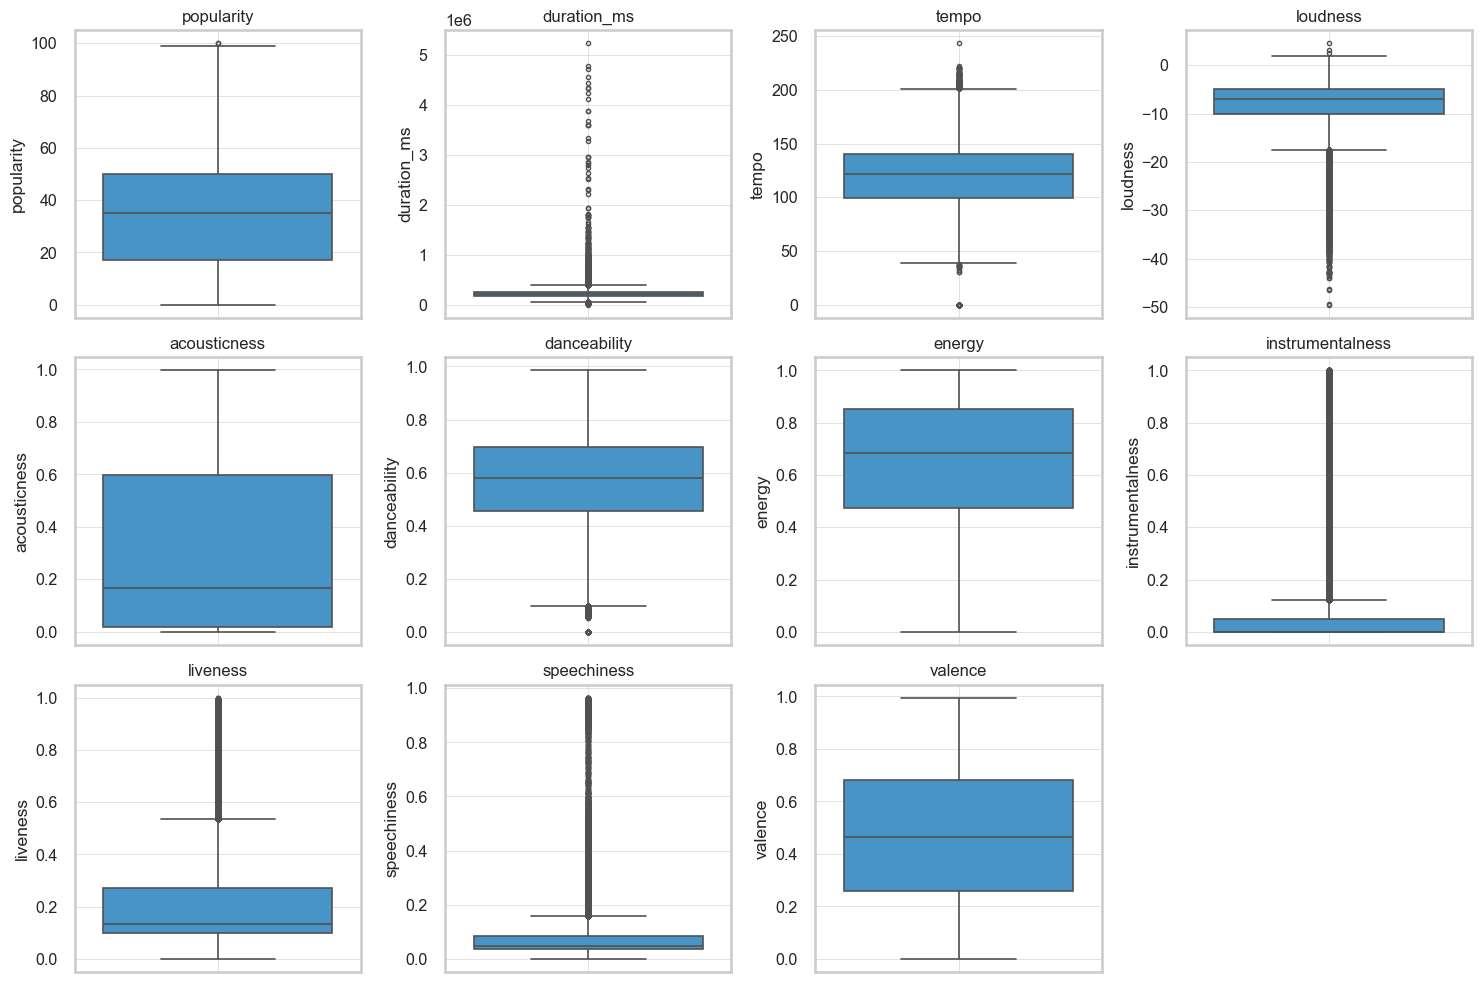

In [65]:
# Box plots for numerical columns

import seaborn as sns
import matplotlib.pyplot as plt

# Set the consistent Seaborn theme and style with the preferred settings
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=0.7)

# Define numerical columns for boxplot
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 
           'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Create subplots for the boxplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=num_cols, ax=axes[i // 4, i % 4], color="#3498db", fliersize=3, linewidth=1.2)
    axes[i // 4, i % 4].set_title(col, fontsize=12)
    axes[i // 4, i % 4].grid(linestyle='-', linewidth=0.5, alpha=0.8)

# Remove the extra empty subplot if any
fig.delaxes(axes[2, 3])  # This removes the 12th plot if there's no data for it

plt.tight_layout()
plt.show()


## Observations

- **No Significant Outliers**: The columns `popularity`, `acousticness`, `energy`, and `valence` show no notable outliers. Although the `popularity` column has one outlier, it is not considered significant.

- **Substantial Outliers in Other Columns**: The remaining columns contain a considerable number of outliers. This is expected, as they are continuous variables with a wide range of values. These columns do not follow a normal distribution and are influenced by various aspects of a song. It is reasonable to retain these outliers, as they add to the dataset's diversity and reflect the complexity and variation inherent in musical attributes.
